In [2]:
import pandas as pd
games_details=pd.read_csv('games_details.csv', low_memory=False)
players=pd.read_csv('players.csv')
games=pd.read_csv('games.csv')

print(games.isna().sum())
print(games_details.isna().sum())
print(players.isna().sum())
len(games_details)

GAME_DATE_EST        0
GAME_ID              0
GAME_STATUS_TEXT     0
HOME_TEAM_ID         0
VISITOR_TEAM_ID      0
SEASON               0
TEAM_ID_home         0
PTS_home            99
FG_PCT_home         99
FT_PCT_home         99
FG3_PCT_home        99
AST_home            99
REB_home            99
TEAM_ID_away         0
PTS_away            99
FG_PCT_away         99
FT_PCT_away         99
FG3_PCT_away        99
AST_away            99
REB_away            99
HOME_TEAM_WINS       0
dtype: int64
GAME_ID                   0
TEAM_ID                   0
TEAM_ABBREVIATION         0
TEAM_CITY                 0
PLAYER_ID                 0
PLAYER_NAME               0
NICKNAME             615591
START_POSITION       412863
COMMENT              558939
MIN                  109690
FGM                  109690
FGA                  109690
FG_PCT               109690
FG3M                 109690
FG3A                 109690
FG3_PCT              109690
FTM                  109690
FTA                  109690


668628

In [3]:
# subsetting
required_columns = ['GAME_ID', 'TEAM_ID', 'PLAYER_ID', 'MIN', 'FGM', 'FTM', 'TO', 'PTS', 'REB', 'AST', 'STL', 'BLK']


games_details_subset = games_details[required_columns]

In [4]:
games.dropna(inplace=True)

players.dropna(inplace=True)

In [5]:
games_details_subset.dropna(inplace=True)
len(games_details)



<ipython-input-5-5371eff29aeb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games_details_subset.dropna(inplace=True)


668628

In [6]:
import pandas as pd



# Select subset of required columns from games_details
required_columns = ['GAME_ID', 'TEAM_ID', 'PLAYER_ID', 'MIN', 'FGM', 'FTM', 'TO', 'PTS', 'REB', 'AST', 'STL', 'BLK']
games_details_subset = games_details[required_columns]

# Handling missing values in each dataset
games.dropna(inplace=True)
games_details_subset.dropna(inplace=True)
players.dropna(inplace=True)

# Merging datasets
merged_data = pd.merge(games, games_details_subset, left_on='GAME_ID', right_on='GAME_ID')
merged_data = pd.merge(merged_data, players, left_on='PLAYER_ID', right_on='PLAYER_ID')




<ipython-input-6-2aa03b6f9bf5>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games_details_subset.dropna(inplace=True)


In [7]:

# Converting 'MIN' column to numeric values
merged_data['MIN'] = pd.to_numeric(merged_data['MIN'], errors='coerce')

# Droping rows where 'MIN' is NaN
merged_data = merged_data.dropna(subset=['MIN'])

# Calculate PER for each player
merged_data['PER'] = (
    (merged_data['PTS'] + merged_data['REB'] + merged_data['AST'] + merged_data['STL'] + merged_data['BLK']
     - merged_data['FGM'] - merged_data['FTM'] - merged_data['TO'])
    / merged_data['MIN']
) * 48  # Per-minute multiplier

# Group by player, team, and season to analyze PER across teams and seasons
per_analysis = merged_data.groupby(['PLAYER_NAME', 'TEAM_ID_home', 'SEASON_x'])['PER'].mean().reset_index()

#most efficient players
most_efficient_players = per_analysis.loc[per_analysis.groupby(['SEASON_x', 'TEAM_ID_home'])['PER'].idxmax()]

# Display the results
print("Player Efficiency Ratings (PER) Analysis:")
print(most_efficient_players)
# top 10 efficient players
#top_10_efficient_players = per_analysis.groupby(['SEASON_x', 'TEAM_ID_home']).apply(lambda x: x.nlargest(10, 'PER')).reset_index(drop=True)


#print("Top 10 Player Efficiency Ratings (PER) for each SEASON and TEAM_ID_home:")
#print(top_10_efficient_players)





Player Efficiency Ratings (PER) Analysis:
            PLAYER_NAME  TEAM_ID_home  SEASON_x         PER
3053       Darius Miles    1610612737      2003  192.000000
1193        Ben Wallace    1610612738      2003  172.800000
3941        Drew Gooden    1610612740      2003  201.600000
12138        Steve Nash    1610612742      2003  163.200000
4027        Dwyane Wade    1610612748      2003  240.000000
...                 ...           ...       ...         ...
3305     DeAndre Jordan    1610612762      2013   39.272727
4020      Dwight Howard    1610612763      2013   41.600000
7451      Kevin Garnett    1610612764      2013   40.000000
7144    Justin Hamilton    1610612765      2013   42.666667
10126  Patrick O'Bryant    1610612766      2013   64.000000

[311 rows x 4 columns]


In [8]:
# Find the index of the maximum PER for each unique year and team combination
max_per_index = merged_data.groupby(['SEASON_x', 'TEAM_ID_home'])['PER'].idxmax()


highest_per_players = merged_data.loc[max_per_index]

# Drop duplicate years, keeping only the player with the maximum total points and total rebounds in case of ties
highest_per_players = highest_per_players.sort_values(by=['SEASON_x', 'TEAM_ID_home', 'PTS', 'REB'], ascending=[True, True, False, False])
highest_per_players = highest_per_players.drop_duplicates(subset=['SEASON_x', 'TEAM_ID_home'])

print("Highest PER Player for Each Year:")
print(highest_per_players[['SEASON_x', 'TEAM_ID_home', 'PLAYER_NAME', 'PER', 'PTS', 'REB']])

Highest PER Player for Each Year:
         SEASON_x  TEAM_ID_home       PLAYER_NAME         PER   PTS   REB
3561750      2003    1610612737      Darius Miles  192.000000  13.0   7.0
3479369      2003    1610612738       Ben Wallace  172.800000  17.0   6.0
2133719      2003    1610612740       Drew Gooden  201.600000  29.0   5.0
3027833      2003    1610612742        Steve Nash  163.200000  12.0   2.0
1908239      2003    1610612748       Dwyane Wade  240.000000  18.0   8.0
...           ...           ...               ...         ...   ...   ...
1060693      2013    1610612762    Derrick Favors   40.320000  10.0  14.0
1270357      2013    1610612763     Dwight Howard   41.600000   6.0  10.0
3265422      2013    1610612764    Josh Childress   64.000000   3.0   1.0
2831569      2013    1610612765   Justin Hamilton   42.666667   8.0   4.0
3288030      2013    1610612766  Patrick O'Bryant   64.000000   2.0   5.0

[311 rows x 6 columns]


In [13]:
import pandas as pd

# Assuming you already have the highest_per_players DataFrame

# Sort the DataFrame by 'PER' within each season and then by 'SEASON_x'
sorted_highest_per_players = highest_per_players.sort_values(by=['SEASON_x', 'PER'], ascending=[True, False])

# Display the sorted DataFrame
print("Sorted DataFrame:")
print(sorted_highest_per_players[['SEASON_x', 'TEAM_ID_home', 'PLAYER_NAME', 'PER', 'PTS', 'REB']])

# Save the sorted DataFrame to a CSV file
file_path_sorted = "/content/sample_data/highest_per_players_sorted.csv"
sorted_highest_per_players.to_csv(file_path_sorted, index=False)

# Print a message indicating successful saving
print(f"Sorted DataFrame saved to: {file_path_sorted}")


Sorted DataFrame:
         SEASON_x  TEAM_ID_home      PLAYER_NAME         PER   PTS   REB
1908239      2003    1610612748      Dwyane Wade  240.000000  18.0   8.0
1889842      2003    1610612760    Rashard Lewis  240.000000  35.0   4.0
2520757      2003    1610612765    Carlos Boozer  240.000000  15.0  14.0
2133719      2003    1610612740      Drew Gooden  201.600000  29.0   5.0
3561750      2003    1610612737     Darius Miles  192.000000  13.0   7.0
...           ...           ...              ...         ...   ...   ...
2831569      2013    1610612765  Justin Hamilton   42.666667   8.0   4.0
2537650      2013    1610612749   Josh McRoberts   42.000000   9.0   2.0
1270357      2013    1610612763    Dwight Howard   41.600000   6.0  10.0
1060693      2013    1610612762   Derrick Favors   40.320000  10.0  14.0
2537600      2013    1610612752   Josh McRoberts   37.333333  19.0   9.0

[311 rows x 6 columns]
Sorted DataFrame saved to: /content/sample_data/highest_per_players_sorted.csv


In [16]:
# Drop rows with 'inf' values in the 'PER' column
import numpy as np
sorted_highest_per_players = sorted_highest_per_players.replace([np.inf, -np.inf], np.nan).dropna(subset=['PER'])

# Select only one player per SEASON_x (the first value)
subset_highest_per_players = sorted_highest_per_players.groupby('SEASON_x').first().reset_index()

# Display the subset DataFrame
print("Subset of Highest PER Players:")
print(subset_highest_per_players[['SEASON_x', 'TEAM_ID_home', 'PLAYER_NAME', 'PER', 'PTS', 'REB']])

# Save the subset DataFrame to a CSV file
file_path_subset = "/content/sample_data/highest_per_players_subset.csv"
subset_highest_per_players.to_csv(file_path_subset, index=False)

# Print a message indicating successful saving
print(f"Subset DataFrame saved to: {file_path_subset}")


Subset of Highest PER Players:
    SEASON_x  TEAM_ID_home    PLAYER_NAME         PER   PTS   REB
0       2003    1610612748    Dwyane Wade  240.000000  18.0   8.0
1       2004    1610612757  Zach Randolph  268.800000  13.0  16.0
2       2005    1610612765   Dwayne Jones   72.000000   0.0   2.0
3       2006    1610612763  Vincent Grier  112.000000   2.0   4.0
4       2007    1610612761      Luol Deng   72.000000   2.0   0.0
5       2008    1610612748  Ryan Anderson  384.000000   9.0   9.0
6       2009    1610612753    Will Conroy  120.000000   4.0   1.0
7       2010    1610612743  Al Harrington   96.000000   0.0   1.0
8       2011    1610612750     Kevin Love   53.333333  21.0  15.0
9       2012    1610612739     Beno Udrih   96.000000   3.0   0.0
10      2013    1610612747  Trent Lockett   96.000000   2.0   2.0
Subset DataFrame saved to: /content/sample_data/highest_per_players_subset.csv


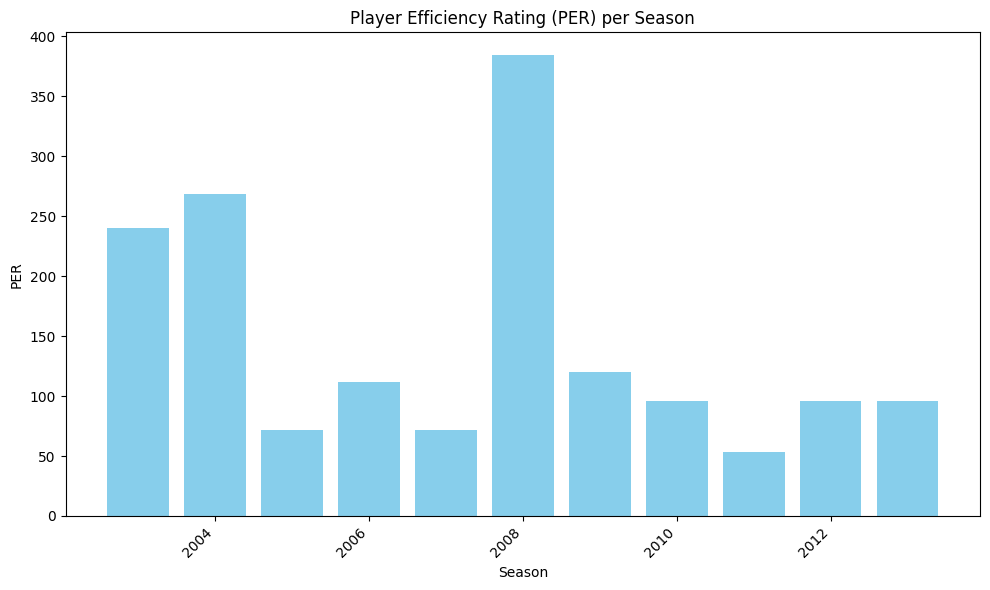

In [20]:
import matplotlib.pyplot as plt

# Assuming you have the subset_highest_per_players DataFrame

# Create a bar plot for PER per season
plt.figure(figsize=(10, 6))
plt.bar(subset_highest_per_players['SEASON_x'], subset_highest_per_players['PER'], color='skyblue')
plt.xlabel('Season')
plt.ylabel('PER')
plt.title('Player Efficiency Rating (PER) per Season')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()

# Show the plot
plt.show()


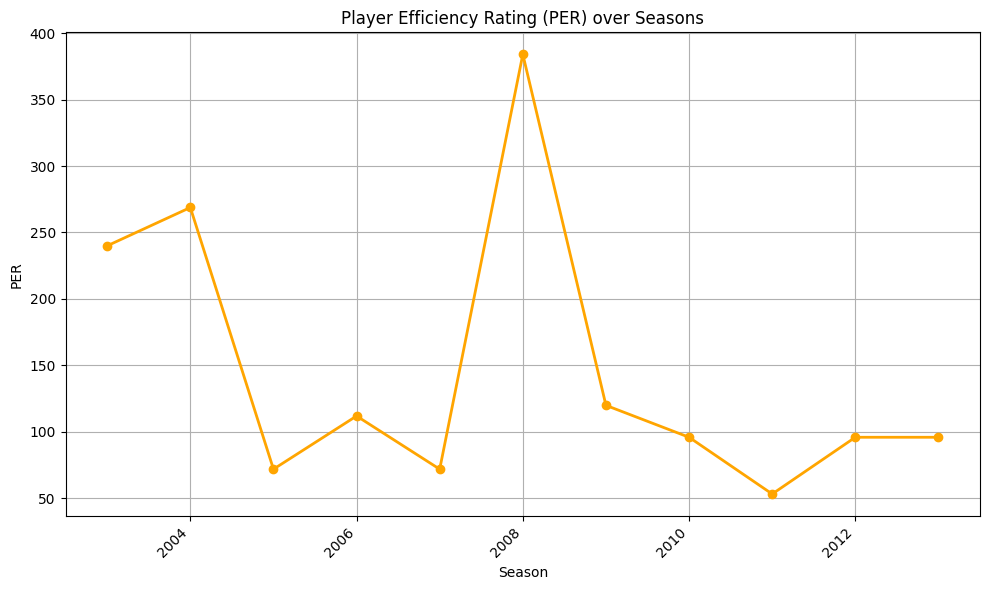

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(subset_highest_per_players['SEASON_x'], subset_highest_per_players['PER'], marker='o', color='orange', linestyle='-', linewidth=2)
plt.xlabel('Season')
plt.ylabel('PER')
plt.title('Player Efficiency Rating (PER) over Seasons')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()

plt.show()


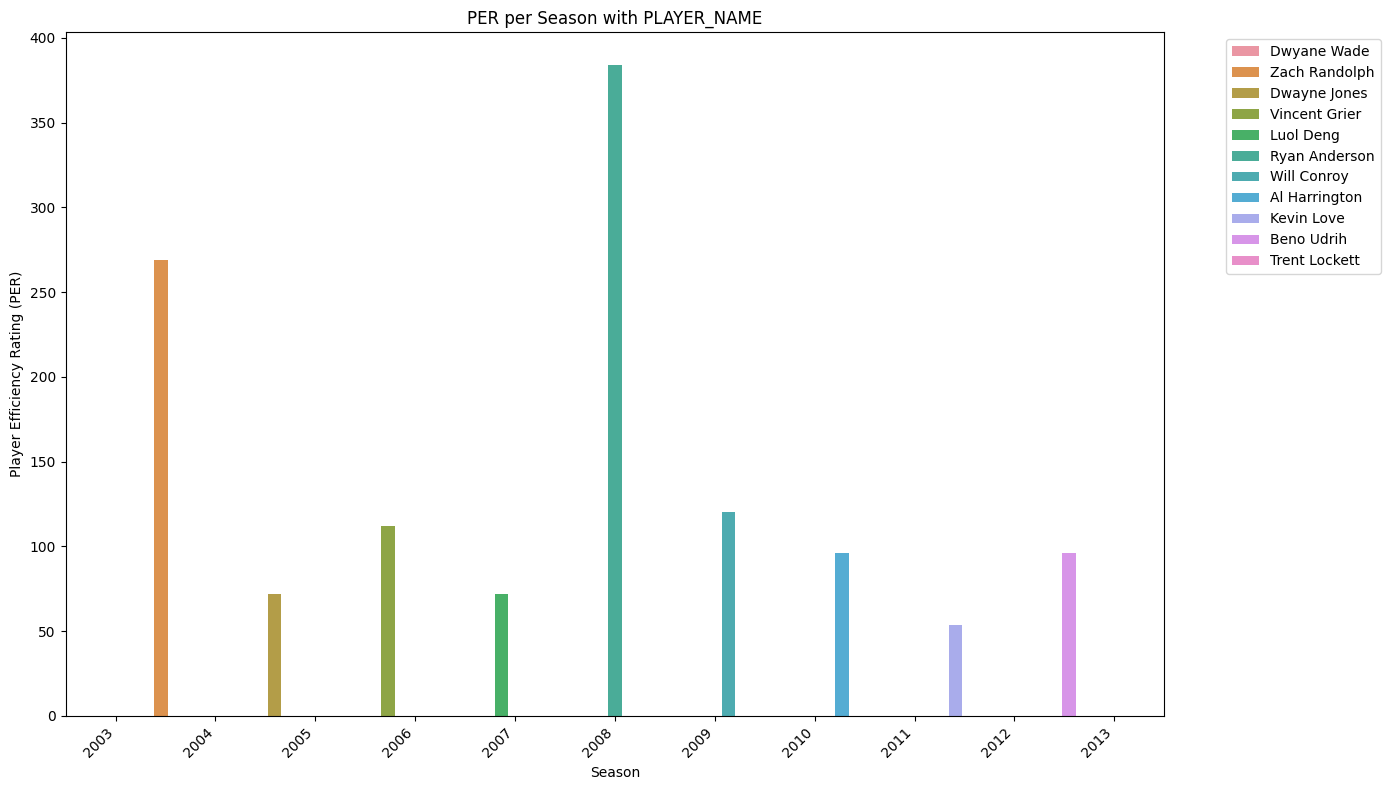

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you already have the subset_highest_per_players DataFrame

# Create a bar plot of PER per season with PLAYER_NAME
plt.figure(figsize=(14, 8))
sns.barplot(x='SEASON_x', y='PER', hue='PLAYER_NAME', data=subset_highest_per_players, dodge=True, width=0.8)
plt.xlabel('Season')
plt.ylabel('Player Efficiency Rating (PER)')
plt.title('PER per Season with PLAYER_NAME')
plt.xticks(rotation=45, ha='right')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Display the plot
plt.show()


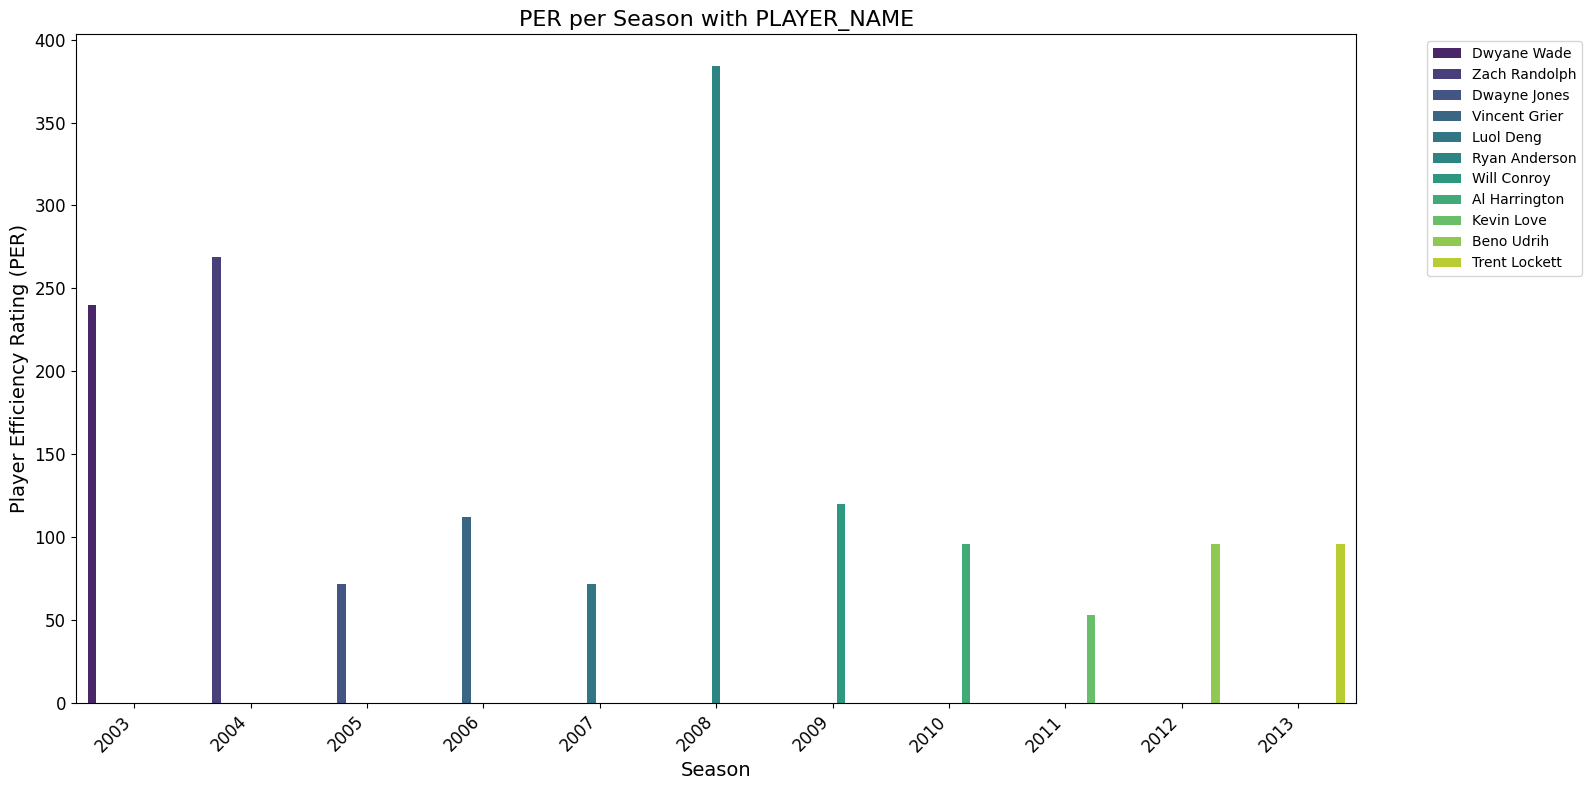

In [29]:

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you already have the subset_highest_per_players DataFrame

# Create a bar plot of PER per season with PLAYER_NAME
plt.figure(figsize=(16, 8))
sns.barplot(x='SEASON_x', y='PER', hue='PLAYER_NAME', data=subset_highest_per_players, dodge=True, palette='viridis', saturation=0.8)
plt.xlabel('Season', fontsize=14)
plt.ylabel('Player Efficiency Rating (PER)', fontsize=14)
plt.title('PER per Season with PLAYER_NAME', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Display the plot
plt.show()
